Predict students' dropout and academic success


This dataset offers a tangible connection to a real-world, pressing issue. The implications of successfully identifying and assisting students at risk extend far beyond the confines of the classroom. It has the potential to positively impact the trajectory of individuals' lives and contribute to the broader goal of creating a more inclusive and successful higher education environment.

In [48]:
# Importing the dataset
import pandas as pd
pd.options.display.max_columns = 200
data = pd.DataFrame(pd.read_csv("data.csv", delimiter=";"))
data.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


DATASET UNDERSTANDING

In [49]:
data_attributes, data_samples = data.shape[1], data.shape[0]

print(f"Features: {data_attributes}")
print(f"Samples: {data_samples}")

Features: 37
Samples: 4424


In [50]:
# EXPLORE DATA TYPES
data.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

DATASET PREPARATION

FEATURE SELECTION AND EXPLORATION

In [51]:
# Removed units in second semester as well as gdp and inflation rate

data = data[['Marital status', 
      'Application mode', 
      'Application order', 
      'Course',
       'Daytime/evening attendance\t', 
       'Previous qualification',
       'Previous qualification (grade)', 
       'Nacionality',
       "Mother's qualification", 
       "Father's qualification",
       "Mother's occupation", 
       "Father's occupation", 
       'Admission grade',
       'Displaced', 
       'Educational special needs', 
       'Debtor',
       'Tuition fees up to date', 'Gender', 
       'Scholarship holder',
       'Age at enrollment', 
       'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Unemployment rate',
    'Target']]



# Renaming Nationality
data.rename(columns={"Nacionality": "Nationality"}, inplace=True)

In [52]:
# check for duplicates
data.loc[data.duplicated()]
# We have no duplicates

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Unemployment rate,Target


FEATURE UNDERSTANDING

UNIVARIATE ANALYSIS

In [53]:
import plotly.express as px

# Define a function to create an interactive bar plot with categorical x-axis
def plot_interactive_bar_categorical(dictionary, title, xlabel, ylabel):
    fig = px.bar(x=list(dictionary.keys()), y=list(dictionary.values()), 
                 labels={xlabel: xlabel, ylabel: ylabel}, 
                 title=title)
    fig.update_xaxes(type='category')
    fig.update_layout(xaxis_title=xlabel, yaxis_title=ylabel)  # Updated to add axis titles
    fig.show()
    return fig

# Assuming 'data' is your DataFrame

# Data preparation (same as before)
dropout_by_course = data["Course"].value_counts().to_dict()
dropout_by_gender = data["Gender"].value_counts().to_dict()
dropout_by_age = data["Age at enrollment"].value_counts().to_dict()
dropout_by_curricular_enrolled = data["Curricular units 1st sem (enrolled)"].value_counts().to_dict()

# Plot dropouts by course
fig_course = plot_interactive_bar_categorical(dropout_by_course, "Dropouts by Course", "Course", "Number of Dropouts")

# Plot dropouts by gender
fig_gender = plot_interactive_bar_categorical(dropout_by_gender, "Dropouts by Gender", "Gender", "Number of Dropouts")

# Plot dropouts by age
fig_age = plot_interactive_bar_categorical(dropout_by_age, "Dropouts by Age at Enrollment", "Age at Enrollment", "Number of Dropouts")

# Plot dropouts by curricular units enrolled in the first semester
fig_curricular = plot_interactive_bar_categorical(dropout_by_curricular_enrolled, "Dropouts by Curricular Units 1st Sem (Enrolled)", "Curricular Units", "Number of Dropouts")

# Add a legend
fig_course.update_traces(name="Dropouts by Course")
fig_gender.update_traces(name="Dropouts by Gender")
fig_age.update_traces(name="Dropouts by Age")
fig_curricular.update_traces(name="Dropouts by Curricular Units 1st Sem (Enrolled)")

# Show the legend
fig_course.show()


Feature Distributions

In [54]:
import plotly.graph_objects as go
import plotly.offline as pyo


# Create a KDE trace
kde_trace = go.Histogram(x=data["Age at enrollment"], histnorm='probability density', nbinsx=20, opacity=0.7, marker_color='blue', name='Age Distribution')

# Create layout
layout = go.Layout(title='Age at Enrollment Distribution',
                   xaxis_title='Age at Enrollment',
                   yaxis_title='Density')

# Create figure
fig = go.Figure(data=[kde_trace], layout=layout)

# Show the plot
pyo.iplot(fig)


<AxesSubplot: ylabel='Density'>

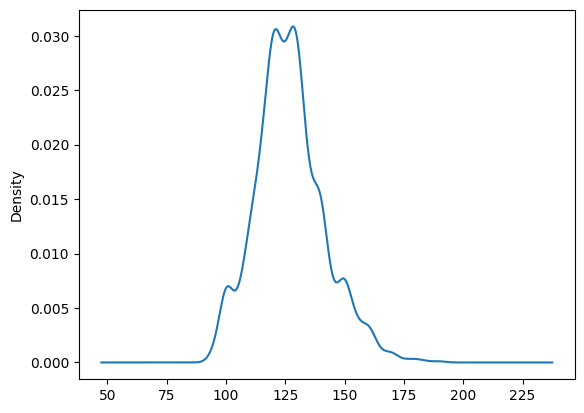

In [55]:
data["Admission grade"].plot(kind='kde')

FEATURE RELATIONSHIPS

In [56]:
import plotly.graph_objects as go
import plotly.offline as pyo

# Create a categorical scatter trace
scatter_trace = go.Scatter(x=data["Nationality"], y=data["Mother's occupation"],
                           mode='markers',
                           marker=dict(color=data["Nationality"], size=10, colorscale='Viridis'),
                           text=data["Nationality"],
                           hoverinfo='text')

# Create layout
layout = go.Layout(title="Scatter Plot of Nationality vs Mother's Occupation",
                   xaxis=dict(title="Nationality"),
                   yaxis=dict(title="Mother's Occupation"))

# Create figure
fig = go.Figure(data=[scatter_trace], layout=layout)

# Show the plot
pyo.iplot(fig)


CORRELATION

<AxesSubplot: >

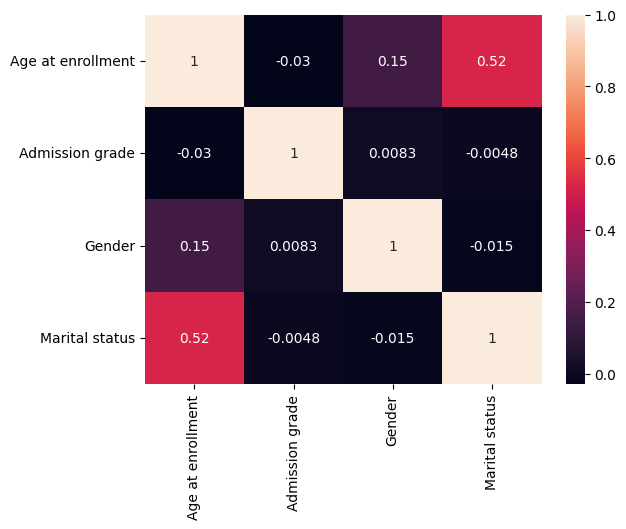

In [58]:
data_corr = data[['Age at enrollment', 
     'Admission grade',
     'Gender',
     'Marital status'
     ]].corr()

import seaborn as sns
sns.heatmap(data_corr, annot=True)